# HW 2: Introduction and Setup
* Open the file "transforms.py"
* Complete the functions marked with "TODO"
* Run this notebook and check the output
* If your code is correct, the output should exactly match the rotation matrices shown below. 

In [1]:
# this cell will fail if you haven't correctly copied transforms.py 
# (and subsequent cells will fail if you haven't completed transforms.py)
import transforms as tr
import numpy as np
import sympy as sp
import time

from visualization import VizScene 
from IPython.display import Math, display
from sympy.physics.vector import dynamicsymbols
from sympy.physics.vector.printing import vpprint, vlatex


## 2D rotation by 20 degrees

A 2D rotation by 20 degrees should give the following:
$$
\left[\begin{array}{cc}
0.9397 & -0.342\\
0.342 & 0.9397
\end{array}\right]
$$

In [2]:
print("Define 2D Rotation with Angle = 20 degrees")
R = tr.rot2(20.0/180.0*np.pi)
print(R)

Define 2D Rotation with Angle = 20 degrees
[[ 0.93969262 -0.34202014]
 [ 0.34202014  0.93969262]]


## 2D rotation by 1.1 radians
A 2D rotation by 1.1 radians should give the following:
$$
\left[\begin{array}{cc}
0.4536 & -0.8912\\
0.8912 & 0.4536
\end{array}\right]
$$

In [3]:
print("\nSpecify that the angle is 1.1 radians")
R = tr.rot2(1.1)
print(R)


Specify that the angle is 1.1 radians
[[ 0.45359612 -0.89120736]
 [ 0.89120736  0.45359612]]


## 3D rotations $R_x(30)$, $R_y(25)$, and $R_z(15)$   (all in degrees) 

Using the "rotx" function to make a 3D rotation about the x axis of 30 degrees, we get:
$$
\left[\begin{array}{ccc}
1.0 & 0 & 0 \\
0 & 0.866 & -0.5 \\
0 & 0.5   & 0.866 
\end{array}\right]
$$

Using the "roty" function to make a 3D rotation about the y axis of 25 degrees, we get:
$$
\left[\begin{array}{ccc}
0.9063 & 0 & 0.4226 \\
0 & 1.0 & 0\\
-0.4226 & 0  & 0.9063 
\end{array}\right]
$$

Using the "rotz" function to make a 3D rotation about the z axis of 15 degrees, we get:
$$
\left[\begin{array}{ccc}
0.9659 & -0.2588 & 0 \\
0.2588 & 0.9659 & 0 \\
0 & 0 & 1.0
\end{array}\right]
$$

In [4]:
print("\nUse rotx to make a 3D rotation about the x axis of 30 degrees")
R = tr.rotx(30.0/180.0*np.pi)
print(R)

print("\nUse roty to make a 3D rotation about the y axis of 25 degrees")
R = tr.roty(25.0/180.0*np.pi)
print(R)

print("\nUse rotz to make a 3D rotation about the z axis of 15 degrees")
R = tr.rotz(15.0/180.0*np.pi)
print(R)


Use rotx to make a 3D rotation about the x axis of 30 degrees
[[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]

Use roty to make a 3D rotation about the y axis of 25 degrees
[[ 0.90630779  0.          0.42261826]
 [ 0.          1.          0.        ]
 [-0.42261826  0.          0.90630779]]

Use rotz to make a 3D rotation about the z axis of 15 degrees
[[ 0.96592583 -0.25881905  0.        ]
 [ 0.25881905  0.96592583  0.        ]
 [ 0.          0.          1.        ]]


## Composition of 3D rotations:

Composing a 3D rotation about the x, y, and z axes as follows $R_x(10)*R_y(15)*R_z(20)$ (all in degrees), should give: 
$$
\left[\begin{array}{ccc}
0.9077 & -0.3304 & 0.2588 \\
0.3791 & 0.91 & -0.1677 \\
-0.1801 & 0.2504 & 0.9512 
\end{array}\right]
$$

Finding the inverse of a rotation matrix, and multiplying it by the original rotation matrix, should result in the identity matrix:
$$
\left[\begin{array}{ccc}
1.0 & 0 & 0 \\
0 & 1.0 & 0 \\
0 & 0 & 1.0
\end{array}\right]
$$

In [5]:
print("\nCompose multiple rotations about the x, y, and z axes")
R = tr.rotx(10/180.0*np.pi) @ tr.roty(15/180.0*np.pi) @ tr.rotz(20/180.0*np.pi)
print(R)

print("\nDemonstrate that your implementation of the .inv() function returns the inverse of a rotation")
R = tr.rotx(20/180.0*np.pi)
R = R @ tr.rot_inv(R)
print(R)
print("\n")


Compose multiple rotations about the x, y, and z axes
[[ 0.90767337 -0.33036609  0.25881905]
 [ 0.37905712  0.91004501 -0.16773126]
 [-0.18012426  0.2503524   0.95125124]]

Demonstrate that your implementation of the .inv() function returns the inverse of a rotation
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.22218033e-17]
 [0.00000000e+00 2.22218033e-17 1.00000000e+00]]




## Checking commutativity:

The previoius rotation described as $R_x(10)*R_y(15)*R_z(20)$ (all in degrees), gave the following: 
$$
\left[\begin{array}{ccc}
0.9077 & -0.3304 & 0.2588 \\
0.3791 & 0.91 & -0.1677 \\
-0.1801 & 0.2504 & 0.9512 
\end{array}\right]
$$

Show that performing the operations in the opposite order does NOT give the same result. 

In [6]:
print("\nRotation about current z, then y, then x axes:")
R = tr.rotz(20/180.0*np.pi) @ tr.roty(15/180.0*np.pi) @ tr.rotx(10/180.0*np.pi)
print(R)


Rotation about current z, then y, then x axes:
[[ 0.90767337 -0.29459106  0.29890661]
 [ 0.33036609  0.94078815 -0.07599942]
 [-0.25881905  0.16773126  0.95125124]]


# Homework Problems

## 2: Learn Sympy
Complete!

## 3: 



Consider the following sequences of rotation and write the matrix product that will give the resulting rotation matrix (don’t perform the operation, just write the correct order - e.g. $R_x(\alpha)R_y(\beta)$ etc.):

1. rotate by $\phi$ in the x-axis, $\theta$ in the z-axis, then $\psi$ in the y-axis all in the current frame.

    $ R_x(\phi) R_z(\theta) R_y(\psi) $
    

2. rotate by $\phi$ in the x-axis, $\theta$ in the z-axis, then $\psi$ in the y-axis all in the fixed world frame.

    $R_y(\psi) R_z(\theta) R_x(\phi) $

# 4

A camera has its z-axis parallel to the vector [0, 1, 0] in the world frame, and its y-axis parallel to the vector [0, 0, −1]. What is the attitude of the camera with respect to the world frame expressed as a rotation matrix?

$ R = \begin{bmatrix}
        1 & 0 & 0\\
        0 & 0 & 1 \\
        0 & -1 & 0
        \end{bmatrix}$

# 5

If coordinate frame $O_1$ is obtained by rotating coordinate frame $O_0$ by $\frac{\pi}{2}$ about x-axis followed by a rotation of $\frac{\pi}{2}$ about the y-axis, find the rotation matrix $R$ that represents the composite transformation. Sketch the initial and final frames (or use the “add frame” function again). 

This is for rotations about a fixed axis.



In [7]:
O0 = np.eye(4)

# rotate about x axis
R_01 = lambda the: np.array([[1, 0, 0, 0],
                             [0, np.cos(the), -np.sin(the), 0],
                             [0, np.sin(the), np.cos(the), 0],
                             [0, 0, 0, 1]])

# rotate about y axis
R_12 = lambda the: np.array([[np.cos(the), 0, np.sin(the), 1],
                             [0, 1, 0, 0],
                             [-np.sin(the), 0, np.cos(the), 0],
                             [0, 0, 0, 1]])

R =  R_12(np.pi/2) @ R_01(np.pi/2)
R = np.round(R, decimals=3)

O1 = R @ O0

# run the animation
viz = VizScene()
viz.add_frame(O0, label='O0')
viz.add_frame(O1, label='O1')

viz.hold()

viz.close_viz()

print("Rotation Matrix R = \n" + str(R))


Rotation Matrix R = 
[[ 0.  1.  0.  1.]
 [ 0.  0. -1.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


Rotated coordinate system:

(note that the translation is just to show the two coordinate systems are rotated, they end up in the same place)

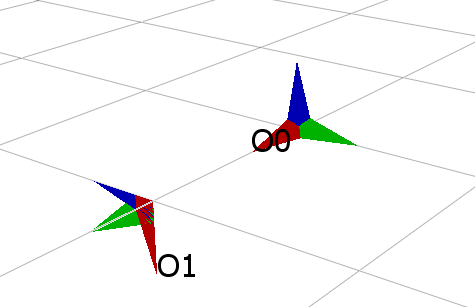

# 6

Suppose three coordinate frames $(o_1, o_2, o_3)$ are given, and that

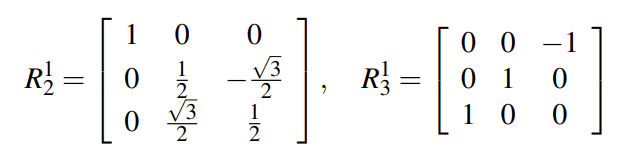

Find the matrix $R^2_3$

$R^1_3 = R^1_2 R^2_3 \quad \rightarrow \quad  R^2_3 = (R^1_2)^T R^1_3$

In [8]:
R_12 = sp.Matrix([[1, 0, 0],
                  [0, sp.Rational(1,2), -sp.sqrt(3)/2],
                  [0, sp.sqrt(3)/2, sp.Rational(1,2)]])

R_13 = sp.Matrix([[0, 0, -1],
                  [0, 1, 0],
                  [1, 0, 0]])

display(Math(r'R^1_2 = ' + vlatex(R_12) + \
             r', \quad R^1_3 = ' + vlatex(R_13)))

R_23 = R_12.T @ R_13

print('find R_23')
display(Math(r'R^2_3 = (R^1_2)^T R^1_3 =  ' + vlatex(R_23)))

<IPython.core.display.Math object>

find R_23


<IPython.core.display.Math object>

# 7

Compute the rotation matrix given by the following product: (you may use symbolic variables to do this, and remember that $\phi$ and $\theta$ are variables, but $\pi$ is a numerical value that should be evaluated)

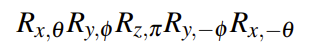

In [9]:
phi, theta = sp.symbols(r'\phi \theta')

# Define functions for Rx, Ry, and Rz
Rx_f = lambda the: sp.Matrix([[1, 0, 0],
                              [0, sp.cos(the), -sp.sin(the)],
                              [0, sp.sin(the), sp.cos(the)]])

Ry_f = lambda the: sp.Matrix([[sp.cos(the), 0, sp.sin(the)],
                              [0, 1, 0],
                              [-sp.sin(the), 0, sp.cos(the)]])

Rz_f = lambda the: sp.Matrix([[sp.cos(the), -sp.sin(the), 0],
                              [sp.sin(the), sp.cos(the), 0],
                              [0, 0, 1]])

R = Rx_f(theta) @ Ry_f(phi) @ Rz_f(sp.pi) @ Ry_f(-phi) @ Rx_f(-theta)
# R = tr.rotx(theta) @ tr.roty(phi) @ tr.rotz(sp.pi) @ tr.roty(-phi) @ tr.rotx(-theta)
display(Math(r'R =  ' + vlatex(R)))

print('\nSimplified:')
sp.trigsimp(R)



<IPython.core.display.Math object>


Simplified:


Matrix([
[                                    -cos(2*\phi),      -cos(2*\phi - \theta)/2 + cos(2*\phi + \theta)/2, sin(2*\phi - \theta)/2 + sin(2*\phi + \theta)/2],
[-cos(2*\phi - \theta)/2 + cos(2*\phi + \theta)/2, -2*sin(\phi)**2*sin(\theta)**2 + 2*sin(\theta)**2 - 1,         -2*sin(\theta)*cos(\phi)**2*cos(\theta)],
[ sin(2*\phi - \theta)/2 + sin(2*\phi + \theta)/2,               -2*sin(\theta)*cos(\phi)**2*cos(\theta),               2*cos(\phi)**2*cos(\theta)**2 - 1]])

# 8

Find the rotation matrix corresponding to the Euler angles $\phi = \frac{\pi}{2}$ , $\theta = 0$, and $\psi = \frac{\pi}{4}$, about the Z, then Y, then Z axes. What is the direction of the new x-axis relative to the base frame?

In [10]:
R_sym = Rz_f(sp.pi/2) @ Ry_f(0) @ Rz_f(sp.pi/4)
display(Math(r'R = ' + vlatex(R)))

R = np.array(R_sym).astype(np.float64)
print('R = \n' + str(R))

R = np.column_stack((R, [0, 0, 0]))
R = np.vstack((R, [0, 0, 0, 1]))

viz = VizScene()
viz.add_frame(O0, label='O0')
viz.add_frame(R, label='R')

viz.hold()

viz.close_viz()

<IPython.core.display.Math object>

R = 
[[-0.70710678 -0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Original coordinate system (O0) and the new x axis (R) in red, pointing 45 degrees from the original x and -y axis, on the xy plane.

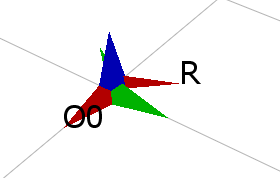

## 9

Make an animation of a rotating coordinate frame and either video it with a phone or screen capture for submission. You can do this in a new Python file, or use the Jupyter notebook (building on examples from HW 01). You can describe this transform using an equation like the following (but you can also pick your own as well as long as it results in an actual
rotation matrix in the top left 3x3 entries):

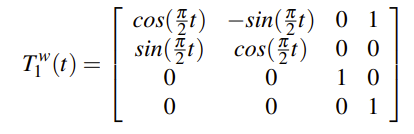

The animation can be done using the ```add_frame``` function from HW01, but by passing an additional argument to the ```viz.update()``` function as follows (where the matrix argument just tells our function how to change the frame orientation over time):

```viz.update(As=[np.eye(4), Tw_to_frame1])```

In other words, we just need to pass in an updated transformation for each frame if we want to plot them over time or as they change. The first frame (identity) is not required, but we do need to update every frame that has been declared.

In [11]:
Tw_to_frame1_f = lambda t: np.array([[np.cos(np.pi/2 * t), -np.sin(np.pi/2 * t), 0, 1],
                                   [np.sin(np.pi/2 * t), np.cos(np.pi/2 * t), 0, 0],
                                   [0, 0, 1, 0],
                                   [0, 0, 0, 1]])

def Tw_to_frame1_f2(t):
    R = tr.rotx(np.pi/2 * t) @ tr.roty(np.pi/2 * t) @ tr.rotz(np.pi/2 * t)
    R = np.column_stack((R, [1, 1, 0]))
    R = np.vstack((R, [0, 0, 0, 1]))
    
    return R

viz = VizScene()
viz.add_frame(np.eye(4), label='world')
viz.add_frame(Tw_to_frame1_f(0), label='frame1')
viz.add_frame(Tw_to_frame1_f2(0), label='frame2')

time_to_run = 10
refresh_rate = 60
for i in range(refresh_rate * time_to_run):
    t = time.time()
    Tw_to_frame1 = Tw_to_frame1_f(t)
    Tw_to_frame1_2 = Tw_to_frame1_f2(t)
    viz.update(As=[np.eye(4), Tw_to_frame1, Tw_to_frame1_2])
    time.sleep(1.0/refresh_rate)

viz.close_viz()

c:\Users\brend\miniforge3\envs\me537_robotics\Lib\site-packages\pyqtgraph\opengl\GLViewWidget.py:231: RuntimeWarning: 
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\brend\miniforge3\envs\me537_robotics\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\brend\miniforge3\envs\me537_robotics\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\brend\miniforge3\envs\me537_robotics\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\brend\miniforge3\envs\me537_robotics\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\brend\miniforge3\envs\me537_robotics\Lib\asyncio\base_events.py", line 641, in run_forever
    self._run_once()
  File "c:\User

Error while drawing item <pyqtgraph.opengl.items.GLGridItem.GLGridItem object at 0x000001B6A6EA96D0>.


GLError: GLError(
	err = 1282,
	description = b'invalid operation',
	baseOperation = glMatrixMode,
	cArguments = (GL_MODELVIEW,)
)

## Animating a Coordinate Frame

We can implement and test the code for problem 9 here:

In [12]:
import time
from visualization import VizScene 

# now you can use functions like "VizScene" and "add_frame" 
# as demonstrated in HW 01 to animate a frame.  
